<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_10_31_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [4]:
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [5]:
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [21]:
from sklearn.preprocessing import Binarizer
from sklearn.base import BaseEstimator
custom_threshold=0.1

lr_clf=LogisticRegression()
lr_clf.fit(X, y)
pred_proba=lr_clf.predict_proba(X)
pred=lr_clf.predict(X)

pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
y_pred2=binarizer.transform(pred_proba_1)

In [22]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
def get_clf_eval(y, y_pred2):
  confusion=confusion_matrix(y, y_pred2)
  accuracy=accuracy_score(y, y_pred2)
  precision=precision_score(y, y_pred2)
  recall=recall_score(y, y_pred2)
  f1=f1_score(y, y_pred2)
  print('오차 행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y, y_pred2)

오차 행렬
[[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717, F1:0.8110


* ROC 곡선 시각화

In [14]:
from sklearn.metrics import roc_curve 
import numpy as np

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X)[:,1]

fprs, tprs, thresholds=roc_curve(y, pred_proba_class1)
#thresholds[0]은 max(예측확률)+1로 임의 설정. 제외하기 위해 np.arange는 1부터 시작.
thr_index=np.arange(1,thresholds.shape[0], 5)

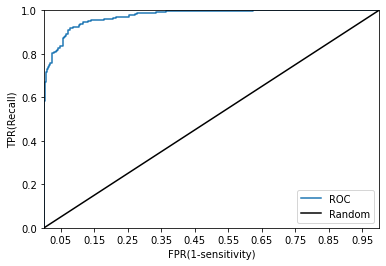

In [15]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
%matplotlib inline

def roc_curve_plot(y, pred_proba_class1):
  fprs, tprs, thresholds=roc_curve(y, pred_proba_class1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0,1], [0,1], 'k-', label='Random')

  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y, pred_proba[:,1])

* ROC AUC 값

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, pred_proba[:,1])

0.9741557000158554